In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cab_rides.csv")
data1 = pd.read_csv("weather.csv")

In [3]:
data.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
data1.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
data.describe()


,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [6]:
data1.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [7]:
data["time_stamp"] = pd.to_datetime(data["time_stamp"],errors = 'coerce')
data1["timestamp"] = pd.to_datetime(data1["time_stamp"],errors = 'coerce')
data1.head()


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,timestamp
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,1970-01-01 00:00:01.545003901
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,1970-01-01 00:00:01.545003901
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,1970-01-01 00:00:01.545003901
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,1970-01-01 00:00:01.545003901
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,1970-01-01 00:00:01.545003901


In [8]:
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1970-01-01 00:25:44.952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1970-01-01 00:25:43.284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1970-01-01 00:25:43.366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1970-01-01 00:25:43.553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1970-01-01 00:25:43.463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [9]:
data1.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'timestamp'],
      dtype='object')

In [10]:
data2 = pd.concat([data,data1])

In [11]:
data2.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind,timestamp
0,0.44,Lyft,1970-01-01 00:25:44.952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1970-01-01 00:25:43.284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1970-01-01 00:25:43.366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1970-01-01 00:25:43.553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1970-01-01 00:25:43.463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [12]:
data1["timestamp"] = pd.to_datetime(data["time_stamp"],errors = 'coerce')
data1["timestamp"] = pd.to_datetime(data["time_stamp"],errors = 'coerce')
data2.columns


Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'timestamp'],
      dtype='object')

In [13]:
data2["day"] =  data2['timestamp'].dt.day
data2["hour"] = data2['timestamp'].dt.hour

In [14]:
data2.fillna(0,inplace = True)
data2.head(100)


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind,timestamp,day,hour
0,0.44,Lyft,1970-01-01 00:25:44.952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.44,Lyft,1970-01-01 00:25:43.284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.44,Lyft,1970-01-01 00:25:43.366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.44,Lyft,1970-01-01 00:25:43.553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.44,Lyft,1970-01-01 00:25:43.463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.82,Lyft,1970-01-01 00:25:44.685910496,West End,Fenway,7.0,1.0,ff49381b-9947-4a40-b100-ca58020e0dbe,lyft_line,Shared,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
96,2.49,Uber,1970-01-01 00:25:44.812509357,Back Bay,South Station,25.0,1.0,118a8165-c787-4761-89e5-a17aa5710c75,6c84fd89-3f11-4782-9b50-97c468b19529,Black,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
97,2.49,Uber,1970-01-01 00:25:44.952912418,Back Bay,South Station,12.0,1.0,14fd1233-8cea-4061-a66a-9a5ecec07f66,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
98,2.49,Uber,1970-01-01 00:25:45.102903559,Back Bay,South Station,12.0,1.0,2a98223c-db41-4d28-9f8a-f26775b12fd4,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [15]:
data2.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind,timestamp,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

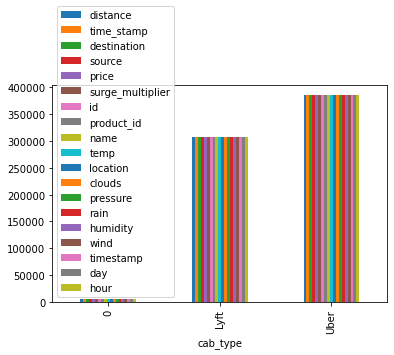

In [16]:
data2.groupby('cab_type').count().plot.bar()

<AxesSubplot:>

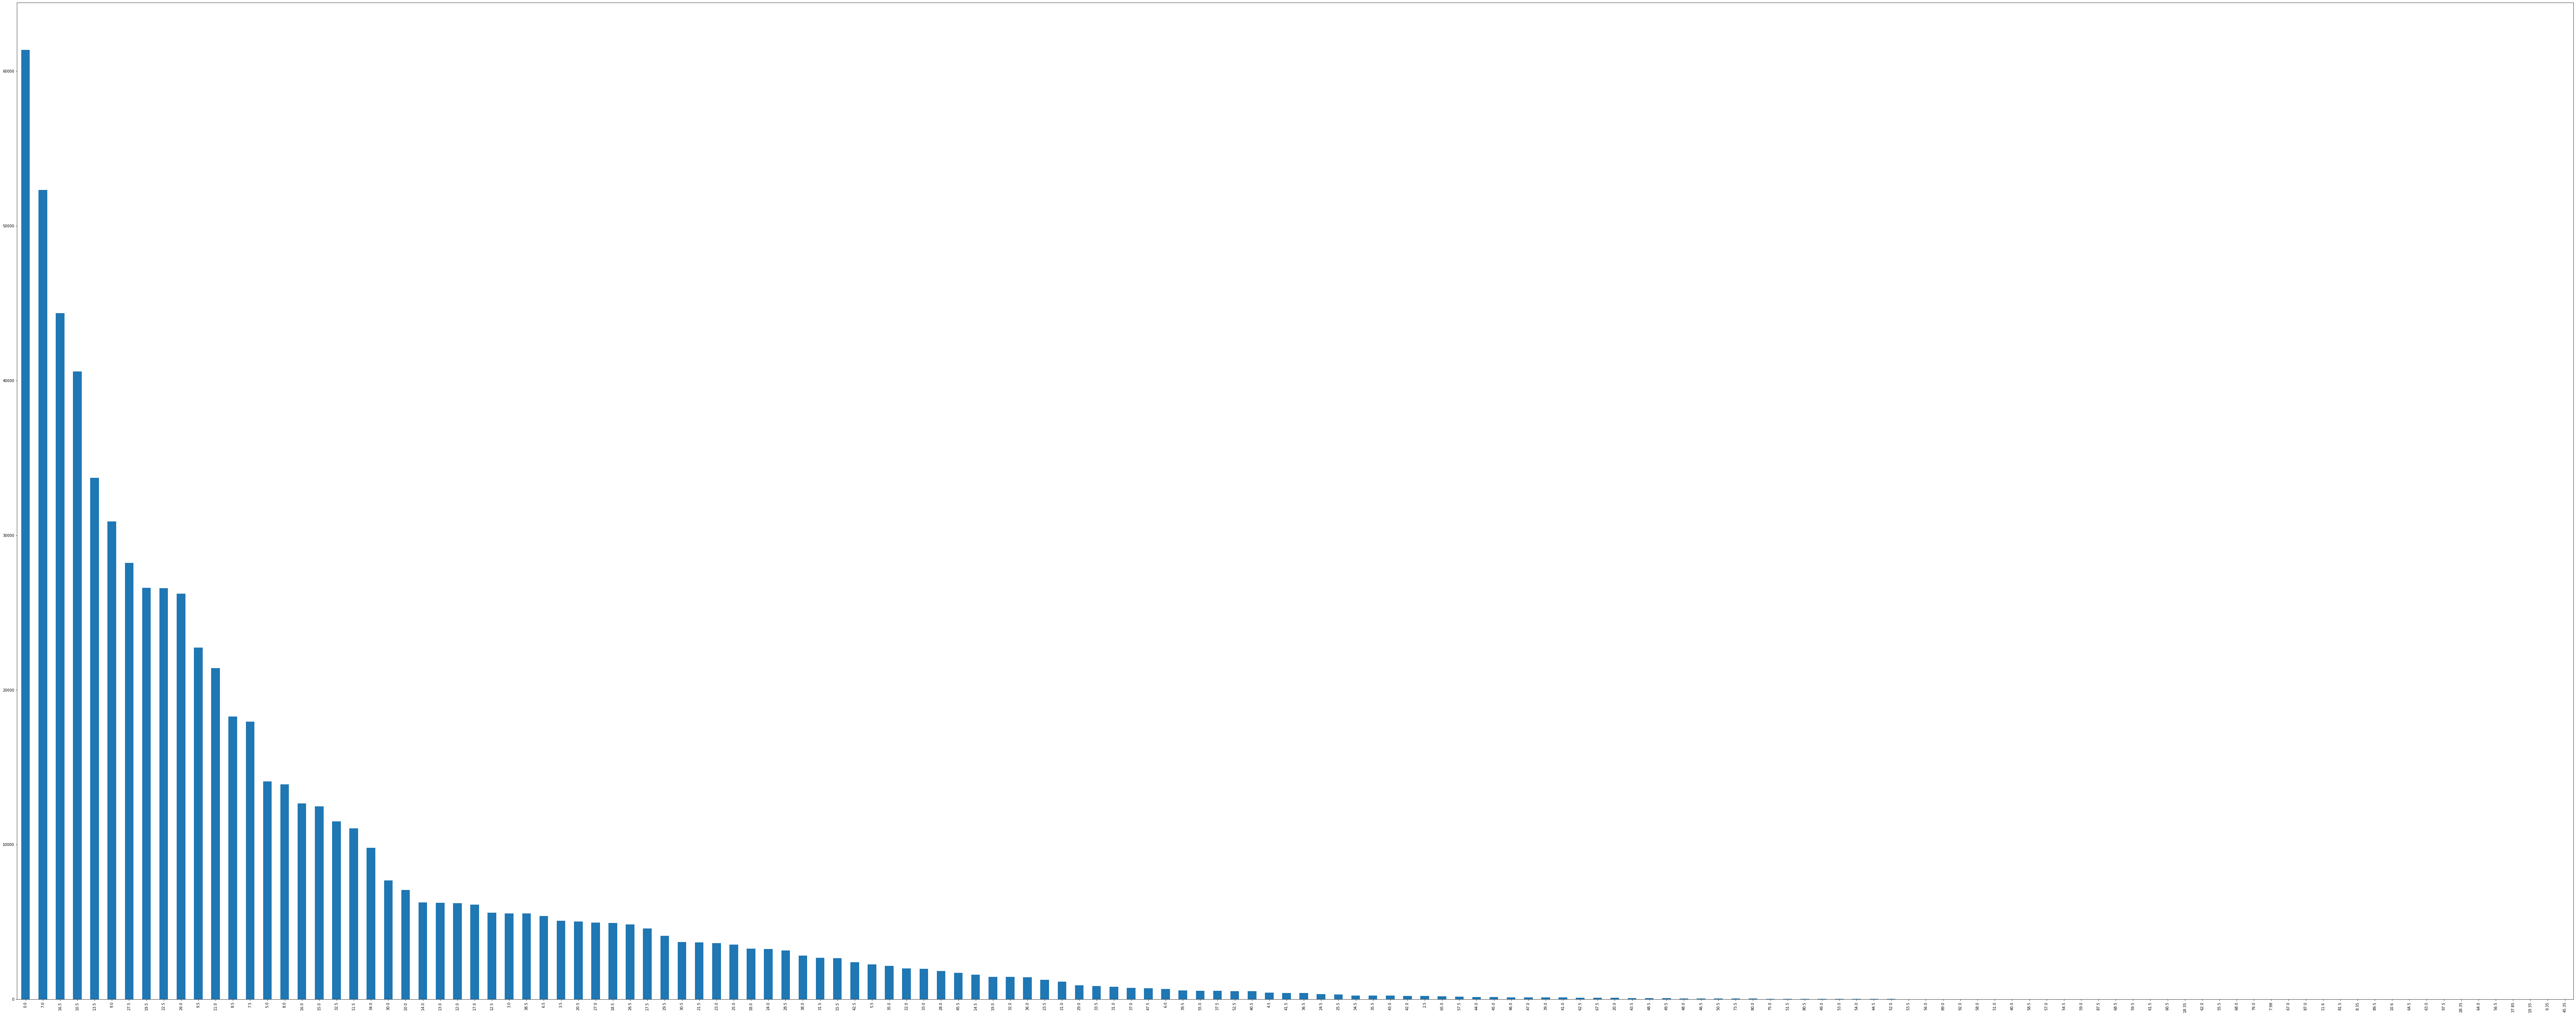

In [17]:
data2['price'].value_counts().plot(kind = 'bar', figsize = (125,50))

<AxesSubplot:>

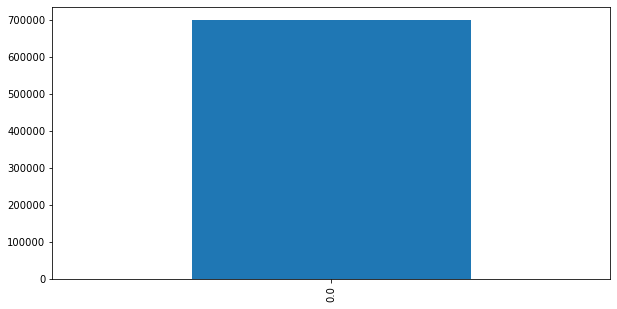

In [18]:
data2['hour'].value_counts().plot(kind = 'bar', figsize = (10,5))

<function matplotlib.pyplot.show(close=None, block=None)>

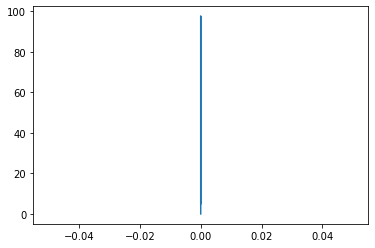

In [19]:
plt.plot(data2['hour'],data2['price'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

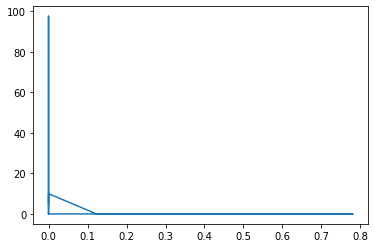

In [21]:
plt.plot(data2['rain'],data2['price'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

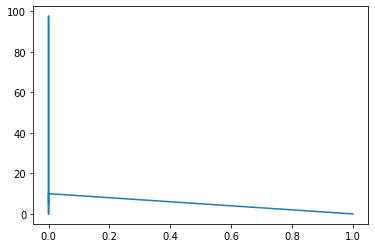

In [23]:
plt.plot(data2['day'],data2['price'])
plt.show

In [42]:
x = data2[['temp', 'distance', 'surge_multiplier', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour']]
y = data2["price"]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size = 0.50, random_state = 42) 

In [71]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [72]:
predict = linear.predict(y_train)

In [73]:
predictions = pd.DataFrame({'actual' : y_test , 'predicted' : predict})

In [74]:
predictions

,actual,predicted
81607,42.5,32.487514
354,0.0,14.765533
471801,32.5,16.814775
407645,27.5,10.515252
474760,27.5,10.591150
...,...,...
495009,22.5,17.523155
219326,9.0,17.497856
316612,32.5,16.131694
316444,19.5,15.752205


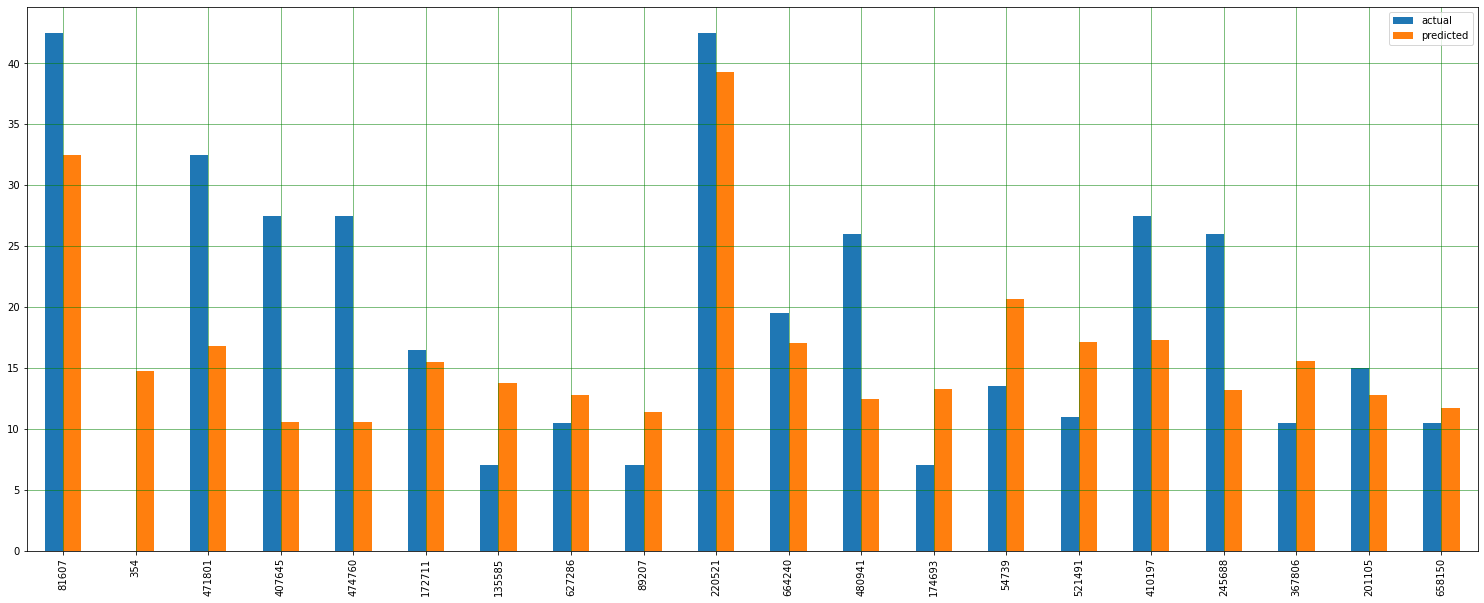

In [75]:
df = predictions.head(20)
df.plot(kind = 'bar' , figsize = (26,10))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()